# Engine Maintainance prediction

## Problem Statement

There have been recent concerns in engine reliability and also the reliability of cars in general.
Some attribute this to tighter emissions regulations leading car manufactures to trade long-
term reliability for lower emissions. We have identified a need for a tool to help drivers judge
the status of the engine specifically given engine data such as oil pressure, temperature etc.

## Objectives

#### 1 . Create a model that predicts engine failure

### Import the libraries

In [30]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,roc_curve)

### Loading the Data

In [31]:
df = pd.read_csv("../data/raw_data.csv")
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


### Data Analysis

In [32]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


#### Check for missing values

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [34]:
df.isnull().sum().sort_values(ascending=True)

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [35]:
# Check class distribution
df["Engine Condition"].value_counts()
df["Engine Condition"].value_counts(normalize=True)

Engine Condition
1    0.630509
0    0.369491
Name: proportion, dtype: float64

In [36]:
df["Engine Condition"].value_counts(normalize=True)

Engine Condition
1    0.630509
0    0.369491
Name: proportion, dtype: float64

#### Distribution of features

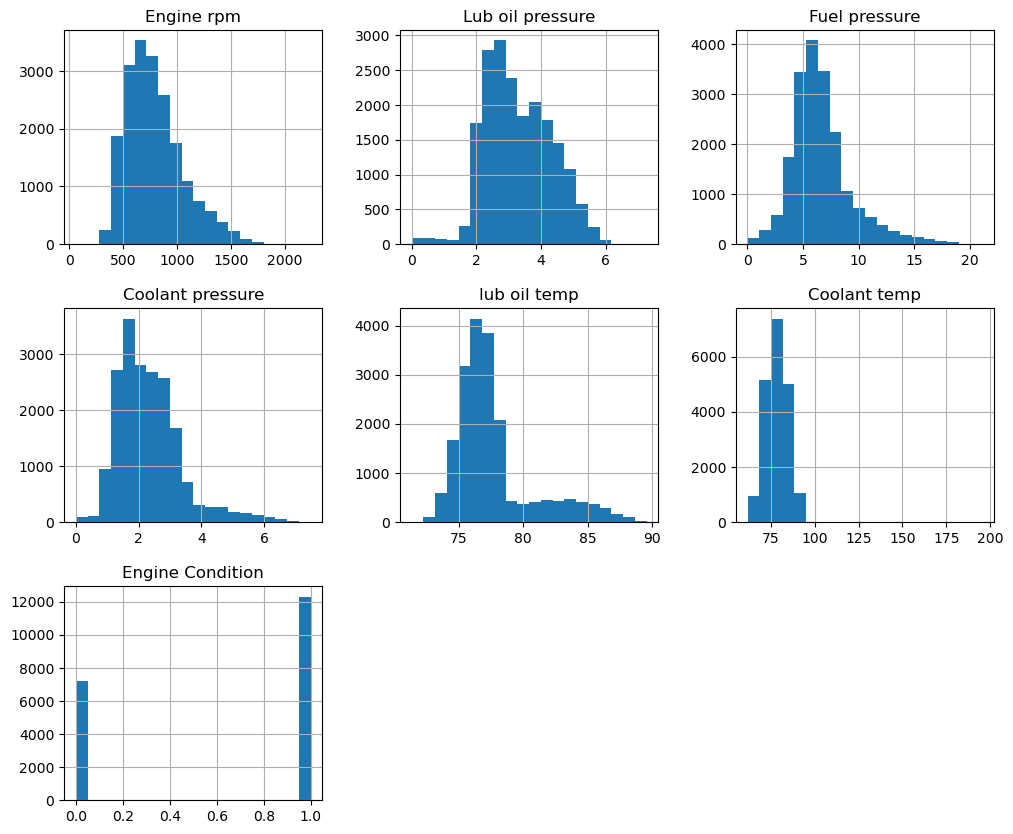

In [37]:
df.hist(bins=20, figsize=(12,10))
plt.show()

### Data Pre-Processing

In [38]:
print(df.columns)

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')


We separated the data into features and target where our target is engine ,engine rpm,coolant temperature.

In [39]:
X = df.drop("Engine Condition", axis=1)
y = df["Engine Condition"]

### Train-Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Feature Scaling

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

### Model 1 : Logistic Regression

In [42]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [43]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred_log = pipeline_lr.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.58      3907
weighted avg       0.64      0.66      0.63      3907



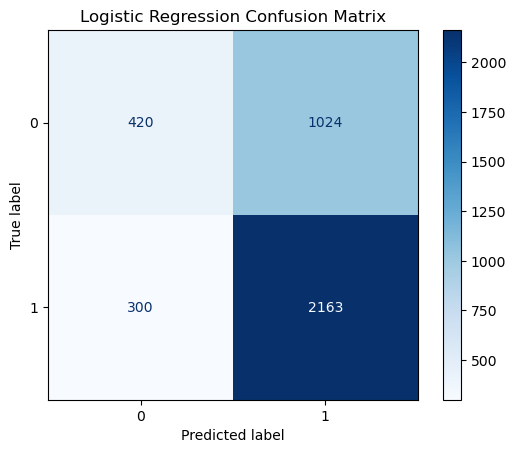

In [45]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Model 2 : Decision Tree

In [46]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.44      0.44      1444
           1       0.67      0.68      0.68      2463

    accuracy                           0.59      3907
   macro avg       0.56      0.56      0.56      3907
weighted avg       0.59      0.59      0.59      3907



### Model 3: Random Forest

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [69]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1444
           1       0.69      0.80      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.65      0.63      3907

[[ 556  888]
 [ 498 1965]]


#### Hyperparameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='recall',  # prioritize detecting failures
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

### Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

#### Best Model

In [53]:
best_model=grid.best_estimator_
print('Best Parameter:',grid.best_estimator_)

Best Parameter: RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)


In [54]:
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.35      0.43      1444
           1       0.68      0.82      0.75      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.65      0.63      3907



In [59]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1444
           1       0.69      0.80      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.65      0.63      3907

[[ 556  888]
 [ 498 1965]]


## Evaluation

In [64]:
print("Logistic Regression Results :")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

Logistic Regression Results :
Accuracy: 0.661121064755567
Precision: 0.678694697207405
Recall: 0.8781973203410475
F1 Score: 0.7656637168141593


In [65]:
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Decision Tree Results
Accuracy: 0.6452521115945739
Precision: 0.6887486855941115
Recall: 0.7978075517661388
F1 Score: 0.7392776523702032


In [66]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Random Forest Results:
Accuracy: 0.6452521115945739
Precision: 0.6887486855941115
Recall: 0.7978075517661388
F1 Score: 0.7392776523702032


### Feature Importance

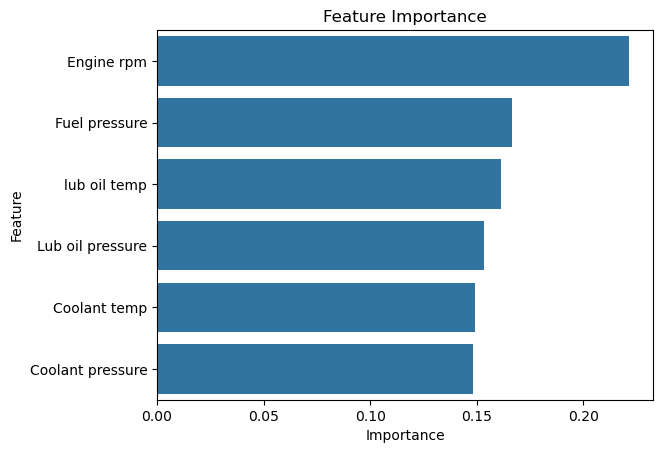

In [67]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df
)
plt.title("Feature Importance")
plt.show()